In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
! pip install wandb
! pip install -U PyYAML
! pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
     |████████████████████████████████| 7.9 MB 32.8 MB/s 
     |████████████████████████████████| 3.5 MB 50.8 MB/s 
     |████████████████████████████████| 2.5 MB 44.8 MB/s 
     |████████████████████████████████| 750 kB 47.5 MB/s 
     |████████████████████████████████| 407 kB 17.2 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616603 sha256=0f43e943aacb7dd8b626ef7030bfd8e5883dc1dd8dadb2b8bb049c1bcf5cf14e
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
Successfully built torch-geometric
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 28.3 MB/s 
     |████████████████████████████████| 181 kB 68.2 MB/s 
     |████████████

In [3]:
%cd /content/drive/MyDrive/Colab_Notebooks/G2X/hatexplain

/content/drive/MyDrive/Colab_Notebooks/G2X/hatexplain


In [4]:
import os
files = os.listdir("data/processed/train")
print("# Train files: ", len(files))
files = os.listdir("data/processed/test")
print("# Test files: ", len(files))

# Train files:  0
# Test files:  0


In [ ]:
#for i in files:
#  os.remove("/content/drive/MyDrive/Colab_Notebooks/G2X/hatexplain/data/processed/train/"+i)

In [ ]:
!python main.py # L2X

Loading dataset...
Creating L2X Model...
Loading L2X Model...
L2X Model loaded.
Compute efficiency: 0.83: 100% 1924/1924 [00:03<00:00, 488.64it/s]
Test Acc: 0.6502 
Loading Explainer...
 Explainer Model Loaded.
 Generating Explanations...
Compute efficiency: 0.82: 100% 1924/1924 [00:02<00:00, 736.03it/s]
Explanations saved.
Visualizing Explanations...
Sentence    :  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - <START> <UNK> <UNK> like nigga care
Rationale    :  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [6]:
!python main.py # G2X

Loading dataset...
Creating G2X Model...
Training G2X Model...
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 3
wandb: You chose 'Don't visualize my results'
wandb: Tracking run with wandb version 0.12.19
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.
Using CUDA: True
Compute efficiency: 0.48, epoch: 0/10::  99% 120/121 [00:41<00:00,  3.48it/s]Epoch: 0  Train Loss: 1.0760  Train Acc: 0.4070 
Compute efficiency: 0.48, epoch: 0/10:: 100% 121/121 [00:41<00:00,  2.90it/s]
Compute efficiency: 0.46, epoch: 1/10:: 100% 121/121 [00:34<00:00,  3.51it/s]
Epoch: 1  Train Loss: 0.9517  Train Acc: 0.5589 
Compute efficiency: 0.46, epoch: 2/10::  99% 120/121 [00:34<00:00,  3.53it/s]Epoch: 2  Train Loss: 0.8967  Train Acc: 0.5907 
Compute efficiency: 0.46, epoch: 2/10:: 100% 121/121 [00:34<00:00,  3.52it/s]
Compute efficiency:

In [7]:
!python benchmarking.py

Hello
Creating dataset list.
Converting dataset to ERASER format.
Done
Converting predictions to ERASER format.
Done
Finito.


In [8]:
!python eraserbenchmark/rationale_benchmark/metrics.py  --split test --strict --data_dir data --results data/output_G2X.jsonl --score_file data/eraser_scores_G2X.json

  2946 MainThread Error in instances: 0 instances fail validation: set()
  6064 MainThread No sentence level predictions detected, skipping sentence-level diagnostic
{'classification_scores': {'accuracy': 0.6195426195426196,
                           'aopc_thresholds': None,
                           'comprehensiveness': 0.28667635131616004,
                           'comprehensiveness_aopc': None,
                           'comprehensiveness_aopc_points': None,
                           'comprehensiveness_entropy': -0.14242699015644172,
                           'comprehensiveness_kl': 0.8647661763567683,
                           'prf': {'accuracy': 0.6195426195426196,
                                   'hatespeech': {'f1-score': 0.7041800643086816,
                                                  'precision': 0.6738461538461539,
                                                  'recall': 0.7373737373737373,
                                                  'support': 594},
 

In [9]:
import json
# print the required results
with open('data/eraser_scores_L2X.json') as fp:
    output_data_l2x = json.load(fp)
with open('data/eraser_scores_G2X.json') as fp:
    output_data_g2x = json.load(fp)
# Build Results table
print ("-" * 125)
print ("| Model |{:<20} | {:<20} | {:<20} | {:<20} | {:<20} |".format(' IOU F1',' Token F1',' AUPRC', ' Comprehensiveness',' Sufficiency' ))
print ("-" * 125)
print ("|  L2X  | {:<20} | {:<20} | {:<20} | {:<20} | {:<20} |"
         .format(output_data_l2x['iou_scores'][0]['macro']['f1'],
                 output_data_l2x['token_prf']['instance_macro']['f1'],
                 output_data_l2x['token_soft_metrics']['auprc'],
                 output_data_l2x['classification_scores']['comprehensiveness'],
                 output_data_l2x['classification_scores']['sufficiency']))
print ("-" * 125)
print ("|  G2X  |{:<20} | {:<20} | {:<20} | {:<20} | {:<20} |"
         .format(output_data_g2x['iou_scores'][0]['macro']['f1'],
                 output_data_g2x['token_prf']['instance_macro']['f1'],
                 output_data_g2x['token_soft_metrics']['auprc'],
                 output_data_g2x['classification_scores']['comprehensiveness'],
                 output_data_g2x['classification_scores']['sufficiency']))
print ("-" * 125)

-----------------------------------------------------------------------------------------------------------------------------
| Model | IOU F1              |  Token F1            |  AUPRC               |  Comprehensiveness   |  Sufficiency         |
-----------------------------------------------------------------------------------------------------------------------------
|  L2X  | 0.14318588882253663  | 0.26724994701224175  | 0.6979135498745761   | 0.322799737429752    | 0.16956668955527995  |
-----------------------------------------------------------------------------------------------------------------------------
|  G2X  |0.15800476312703957  | 0.2944245917075234   | 0.6836060868340297   | 0.28667635131616004  | 0.1702227551124183   |
-----------------------------------------------------------------------------------------------------------------------------


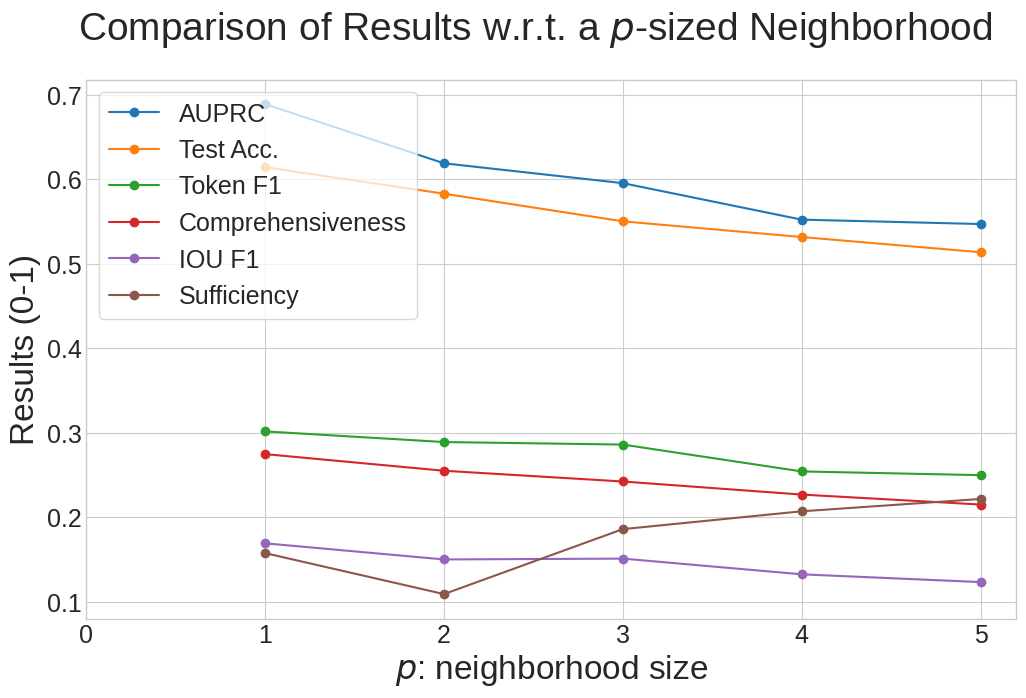

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
p = np.array([0, 1, 2, 3, 4, 5])
test_acc = np.array([np.nan, 0.6143, 0.5830, 0.5503, 0.5317, 0.5137])
iou_f1 = np.array([np.nan, 0.1691, 0.150, 0.151, 0.1324, 0.1232])
token_f1 = np.array([np.nan, 0.3016, 0.289, 0.286, 0.2542, 0.2498])
AUPRC = np.array([np.nan, 0.6891, 0.619, 0.5955, 0.5523, 0.5471])
comp = np.array([np.nan, 0.2747, 0.255, 0.2423, 0.2268, 0.2150])
suf = np.array([np.nan, 0.1575, 0.109, 0.1859, 0.2070, 0.2216])
# Make Plot Figure
fig = plt.figure(figsize=(12, 7))
plt.plot(p, AUPRC, '-o', label = "AUPRC")
plt.plot(p, test_acc, '-o', label = "Test Acc.")
plt.plot(p, token_f1, '-o', label = "Token F1")
plt.plot(p, comp, '-o', label = "Comprehensiveness")
plt.plot(p, iou_f1, '-o', label = "IOU F1")
plt.plot(p, suf, '-o', label = "Sufficiency")
plt.suptitle('Comparison of Results w.r.t. a $p$-sized Neighborhood ', fontsize=28)
plt.xlabel('$p$: neighborhood size', fontsize=24)
plt.ylabel('Results (0-1)', fontsize=24)
plt.xticks(p, p, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(frameon=True, framealpha=0.75, loc='upper left', fontsize=18)
plt.show()

In [ ]:
s